In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import optimize



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataf = pd.read_csv("/content/drive/MyDrive/kp/profundidad/histograma_nucle.txt",sep='\t',header=0)
dataf.describe()
dataf[50:100].head(20)

,ERR2929690_ID,Nucle_cov,Tipo_sec,ERR2929692_ID,Nucle_cov.1,Tipo_sec.1,SRR2244244_ID,Nucle_cov.2,Tipo_sec.2,SRR3465557_ID,Nucle_cov.3,Tipo_sec.3,SRR4025861_ID,Nucle_cov.4,Tipo_sec.4,SRR4245476_ID,Nucle_cov.5,Tipo_sec.5,SRR5146463_ID,Nucle_cov.6,Tipo_sec.6,SRR5167853_ID,Nucle_cov.7,Tipo_sec.7,SRR5168236_ID,Nucle_cov.8,Tipo_sec.8,SRR5168385_ID,Nucle_cov.9,Tipo_sec.9,SRR5168393_ID,Nucle_cov.10,Tipo_sec.10,SRR5168488_ID,Nucle_cov.11,Tipo_sec.11,SRR5714002_ID,Nucle_cov.12,Tipo_sec.12,SRR6348595_ID,Nucle_cov.13,Tipo_sec.13,SRR6514141_ID,Nucle_cov.14,Tipo_sec.14,SRR6514350_ID,Nucle_cov.15,Tipo_sec.15,SRR6519357_ID,Nucle_cov.16,Tipo_sec.16,SRR6675860_ID,Nucle_cov.17,Tipo_sec.17,SRR8175017_ID,Nucle_cov.18,Tipo_sec.18,SRR8607449_ID,Nucle_cov.19,Tipo_sec.19,SRR8607459_ID,Nucle_cov.20,Tipo_sec.20,SRR8607467_ID,Nucle_cov.21,Tipo_sec.21,SRR8778550_ID,Nucle_Cov,Tipo_sec.22
50,51.0,39.0,0.0,51.0,38.0,0.0,51.0,112.0,1.0,51.0,658.0,0.0,51.0,59.0,0.0,0.0,0.0,0.0,51.0,93.0,0.0,51.0,52.0,0.0,51.0,31.0,0.0,51.0,84.0,1.0,51.0,67.0,0.0,51.0,92.0,1.0,51.0,162.0,1.0,51.0,52.0,1.0,51.0,57.0,0.0,51.0,92.0,1.0,51.0,624.0,1.0,51.0,229.0,0.0,0.0,0.0,0.0,51.0,107.0,0.0,51.0,59.0,1.0,51.0,181.0,0.0,51.0,342.0,1.0
51,52.0,63.0,1.0,52.0,45.0,0.0,52.0,77.0,0.0,52.0,664.0,1.0,52.0,48.0,0.0,0.0,0.0,0.0,52.0,148.0,1.0,52.0,72.0,1.0,52.0,46.0,0.0,52.0,54.0,1.0,52.0,51.0,0.0,52.0,79.0,1.0,52.0,178.0,0.0,52.0,66.0,1.0,52.0,123.0,1.0,52.0,49.0,0.0,52.0,263.0,0.0,52.0,264.0,1.0,0.0,0.0,0.0,52.0,110.0,1.0,52.0,69.0,0.0,52.0,1697.0,0.0,52.0,212.0,1.0
52,53.0,35.0,0.0,53.0,97.0,1.0,53.0,102.0,1.0,53.0,648.0,0.0,53.0,50.0,0.0,0.0,0.0,0.0,53.0,97.0,1.0,53.0,31.0,0.0,53.0,56.0,0.0,53.0,87.0,1.0,53.0,146.0,0.0,53.0,85.0,1.0,53.0,374.0,1.0,53.0,89.0,0.0,53.0,72.0,1.0,53.0,46.0,0.0,53.0,659.0,1.0,53.0,223.0,0.0,0.0,0.0,0.0,53.0,174.0,1.0,53.0,41.0,1.0,53.0,369.0,0.0,53.0,278.0,0.0
53,54.0,15.0,0.0,54.0,62.0,0.0,54.0,84.0,0.0,54.0,370.0,1.0,54.0,88.0,1.0,0.0,0.0,0.0,54.0,112.0,1.0,54.0,88.0,1.0,54.0,47.0,0.0,54.0,31.0,0.0,54.0,52.0,0.0,54.0,83.0,1.0,54.0,114.0,0.0,54.0,34.0,0.0,54.0,52.0,0.0,54.0,76.0,0.0,54.0,325.0,0.0,54.0,208.0,0.0,0.0,0.0,0.0,54.0,458.0,1.0,54.0,5501.0,1.0,54.0,1881.0,1.0,54.0,550.0,0.0
54,55.0,48.0,1.0,55.0,71.0,0.0,55.0,37.0,0.0,55.0,654.0,0.0,55.0,44.0,0.0,0.0,0.0,0.0,55.0,241.0,0.0,55.0,69.0,1.0,55.0,57.0,0.0,55.0,61.0,0.0,55.0,617.0,0.0,55.0,133.0,1.0,55.0,481.0,1.0,55.0,45.0,1.0,55.0,142.0,1.0,55.0,50.0,0.0,55.0,481.0,1.0,55.0,186.0,1.0,0.0,0.0,0.0,55.0,151.0,1.0,55.0,40.0,1.0,55.0,2313.0,1.0,55.0,370.0,1.0
55,56.0,42.0,0.0,56.0,59.0,0.0,56.0,115.0,1.0,56.0,1.0,0.0,56.0,116.0,1.0,0.0,0.0,0.0,56.0,139.0,1.0,56.0,75.0,1.0,56.0,154.0,1.0,56.0,57.0,0.0,56.0,28.0,0.0,56.0,81.0,1.0,56.0,103.0,0.0,56.0,48.0,1.0,56.0,79.0,1.0,56.0,45.0,0.0,56.0,215.0,0.0,56.0,1967.0,0.0,0.0,0.0,0.0,56.0,124.0,0.0,56.0,50.0,1.0,56.0,336.0,1.0,56.0,906.0,0.0
56,57.0,56.0,1.0,57.0,62.0,0.0,57.0,115.0,1.0,57.0,344.0,1.0,57.0,82.0,1.0,0.0,0.0,0.0,57.0,355.0,1.0,57.0,104.0,1.0,57.0,62.0,1.0,57.0,49.0,0.0,57.0,67.0,1.0,57.0,84.0,1.0,57.0,381.0,1.0,57.0,43.0,0.0,57.0,121.0,1.0,57.0,49.0,0.0,57.0,488.0,1.0,57.0,440.0,0.0,0.0,0.0,0.0,57.0,128.0,1.0,57.0,8332.0,0.0,57.0,1145.0,1.0,57.0,1397.0,0.0
57,58.0,86.0,1.0,58.0,683.0,0.0,58.0,114.0,1.0,58.0,325.0,0.0,58.0,52.0,0.0,0.0,0.0,0.0,58.0,197.0,1.0,58.0,37.0,0.0,58.0,55.0,0.0,58.0,80.0,1.0,58.0,409.0,1.0,58.0,83.0,1.0,58.0,341.0,1.0,58.0,60.0,1.0,58.0,71.0,1.0,58.0,174.0,1.0,58.0,270.0,0.0,58.0,471.0,0.0,0.0,0.0,0.0,58.0,92.0,0.0,58.0,57.0,1.0,58.0,285.0,1.0,58.0,638.0,1.0
58,59.0,79.0,1.0,59.0,23.0,0.0,59.0,97.0,1.0,0.0,0.0,0.0,59.0,188.0,1.0,0.0,0.0,0.0,59.0,1067.0,0.0,59.0,314.0,1.0,59.0,66.0,1.0,59.0,87.0,1.0,59.0,21.0,0.0,59.0,90.0,1.0,59.0,71.0,0.0,59.0,47.0,1.0,59.0,70.0,0.0,59.0,247.0,1.0,59.0,275.0,0.0,59.0,186.0,1.0,0.0,0.0,0.0,59.0,153.0,1.0,59.0,63.0,1.0,59.0,160.0,0.0,59.0,306.0,0.0
59,60.0,333.0,0.0,60.0,160.0,1.0,60.0,766.0,0.0,0.0,0.0,0.0,60.0,106.0,0.0,0.0,0.0,0.0,60.0,186.0,1.0,60.0,207.0,1.0,60.0,51.0,0.0,60.0,40.0,0.0,6

In [ ]:
m690=dataf.iloc[:,:3]
kmercov=m690['Nucle_cov']
kmercov=kmercov*151/(151-127+1)
kmercov.head()

0    265.76
1    241.60
2    277.84
3    247.64
4    265.76
Name: Nucle_cov, dtype: float64

       ERR2929690_ID    Nucle_cov   Tipo_sec
count      73.000000    73.000000  73.000000
mean       37.000000    86.917808   0.232877
std        21.217131   259.555964   0.425589
min         1.000000     8.000000   0.000000
25%        19.000000    39.000000   0.000000
50%        37.000000    44.000000   0.000000
75%        55.000000    50.000000   0.000000
max        73.000000  2229.000000   1.000000
range(8, 228, 22)
[ 5 53  4  5  0  1  0  0  1  0  1  1  0  0  1  0] [  8  30  52  74  96 118 140 162 184 206 228 250 272 294 316 338 360]
[0 8 3 3 0 1 0 0 1 0 1 0 0 0 0 0] [  8  30  52  74  96 118 140 162 184 206 228 250 272 294 316 338 360]
[ 5 45  1  2  0  0  0  0  0  0  0  1  0  0  1  0] [  8  30  52  74  96 118 140 162 184 206 228 250 272 294 316 338 360]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


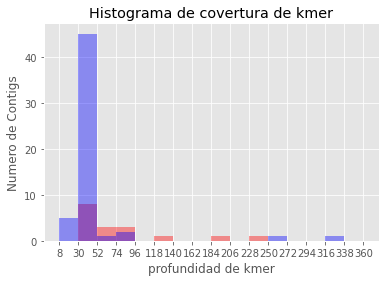

In [4]:
m690=dataf.iloc[:,:3]
m690filt=m690[m690['ERR2929690_ID']!=0]
print(m690filt.describe())
#intervalos=range(int(min(m690filt['Kmer_Cov'])),int(max(m690filt['Kmer_Cov']))+3,int((max(m690filt['Kmer_Cov'])-min(m690filt['Kmer_Cov']))/100))
intervalos=range(int(min(m690filt['Nucle_cov'])),int(max(m690filt['Nucle_cov'])/6),int((max(m690filt['Nucle_cov'])-min(m690filt['Nucle_cov']))/100))
print(intervalos[:10])
frecuencias, extremos = np.histogram(m690filt['Nucle_cov'], bins=intervalos)
print(frecuencias, extremos)
plasm690=m690filt[m690filt['Tipo_sec']==1]
crom690=m690filt[m690filt['Tipo_sec']==0]
#print(plasm690,crom690)
frecuenciasp, extremosp = np.histogram(plasm690['Nucle_cov'], bins=intervalos)
frecuenciasc, extremosc = np.histogram(crom690['Nucle_cov'], bins=intervalos)
print(frecuenciasp, extremosp)
print(frecuenciasc, extremosc)
sns.distplot(plasm690['Nucle_cov'], kde=False, color='red', bins=intervalos)
sns.distplot(crom690['Nucle_cov'], kde=False, color='blue', bins=intervalos)
#plt.hist(x=plasm690['Kmer_Cov'], bins=intervalos, color='#33FF9F', rwidth=0.85)
#plt.hist(x=crom690['Kmer_Cov'], bins=intervalos, color='#33AFFF', rwidth=0.85,)
plt.title('Histograma de covertura de kmer')
plt.xlabel('profundidad de kmer')
plt.ylabel('Numero de Contigs')
plt.xticks(intervalos)
plt.show() #dibujamos el histograma

In [16]:
print(frecuenciasp,extremosp)
print(frecuenciasc,extremosc)

[0 8 3 3 0 1 0 0 1 0 1 0 0 0 0 0] [  8  30  52  74  96 118 140 162 184 206 228 250 272 294 316 338 360]
[ 5 45  1  2  0  0  0  0  0  0  0  1  0  0  1  0] [  8  30  52  74  96 118 140 162 184 206 228 250 272 294 316 338 360]


[  8  30  52  74  96 118 140 162 184 206 228 250 272 294 316 338   8  30
  52  74  96 118 140 162 184 206 228 250 272 294 316 338]
32
32
32
32
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
[(0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.0, 0.0, 0.5, 1.0), (0.4901960784313725, 1.0, 0.4775458570524984, 1.0), (0.4901960784313725, 1.0, 0.4775458570524984, 1.0), (0.4901960784313725, 1.0, 0.4775458570524984, 1.0), (0.4901960784313725, 1.0, 0.4775458570524984, 1.0), (0.4901960784313725, 1.0, 0.4775458570524984, 1.0), (0.4901960784313725, 1.0, 0.4775458570524984, 1.0), (0.4901960784313725, 1.0, 0.4775458570524984, 1.0), (0.4901960784313725, 1.0, 0.4775458570524

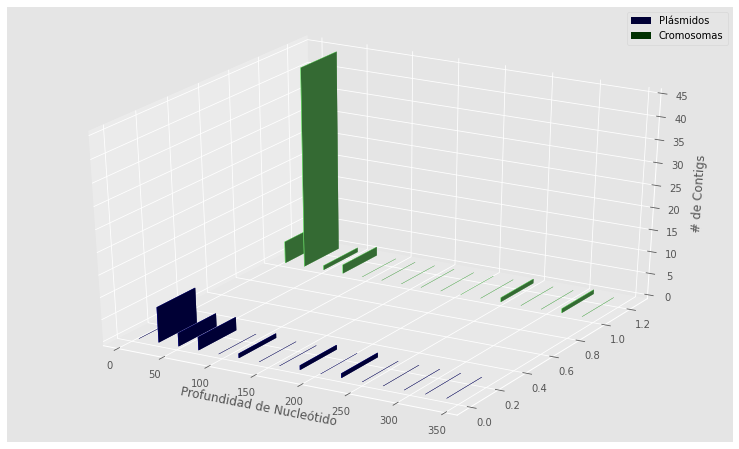

In [70]:
fig = plt.figure(figsize=(13,8))
ax = plt.axes(projection="3d")
xpos=np.concatenate((extremosp[:-1],extremosc[:-1]))
print(xpos)
ypos=np.concatenate((np.zeros(len(extremosp)-1),np.ones(len(extremosc)-1)))
print(len(ypos))
zpos=np.zeros(len(extremosp)+len(extremosp)-2)
print(len(zpos))
dx=np.ones(len(extremosp)+len(extremosp)-2)*0.5
dy=np.ones(len(extremosp)+len(extremosp)-2)*0.25
print(len(dx))
print(len(dy))
dz=np.concatenate(((frecuenciasp),frecuenciasc))
print(ypos)
#
cmap = cm.get_cmap('jet')
rgba = [cmap((k-0)/2) for k in ypos] 
print(rgba)
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
ax.set_xlabel('Profundidad de Nucleótido')
ax.set_zlabel('# de Contigs')
blue_proxy = plt.Rectangle((1, 1), 10, 10, fc='#000035')
red_proxy = plt.Rectangle((1, 1), 10, 10, fc='#003000')
ax.legend([blue_proxy,red_proxy],['Plásmidos','Cromosomas'])
#ax.title('Histograma de Profundidad de Cromosoma Vs Plásmidos')
#

#ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')
plt.show()

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17  1  2  3  4  5  6  7
  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56]
27     49.0
28     47.0
38     49.0
44     49.0
47     50.0
48     50.0
49     48.0
51     63.0
54     48.0
56     56.0
57     86.0
58     79.0
62    245.0
63     52.0
65     75.0
70    186.0
71    126.0
Name: Nucle_cov, dtype: float64


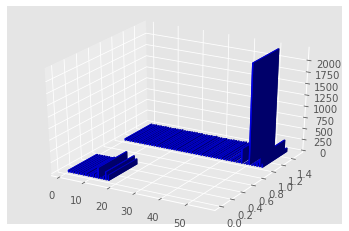

In [11]:
# https://stackoverflow.com/questions/24736758/parameters-required-by-bar3d-with-python



fig = plt.figure()
ax = plt.axes(projection="3d")
xpos=np.concatenate((range(1,len(plasm690['Nucle_cov'])+1),range(1,len(crom690['Nucle_cov'])+1)))
print(xpos)
print(plasm690['Nucle_cov'])
ypos=np.concatenate((np.zeros(len(plasm690['Nucle_cov'])),np.ones(len(crom690['Nucle_cov']))))
zpos=np.zeros(len(plasm690['Nucle_cov'])+len(crom690['Nucle_cov']))
dx=np.ones(len(plasm690['Nucle_cov'])+len(crom690['Nucle_cov']))*0.5
dy=np.ones(len(plasm690['Nucle_cov'])+len(crom690['Nucle_cov']))*0.5
#print(len(dx))
#print(len(dy))
dz=np.concatenate(((plasm690['Nucle_cov']),crom690['Nucle_cov']))
#print(len(dz))
#x = [1, 2, 3, 10]  # x coordinates of each bar
#y = [0, 0, 0, 10] # y coordinates of each bar
#z = [0, 0, 0, 0]  # z coordinates of each bar
#dx = [0.5, 0.5, 0.5, 0.5]  # Width of each bar
#dy = [0.5, 0.5, 0.5, 0.5]  # Depth of each bar
#dz = [5, 4, 7, 3]        # Height of each bar

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')
plt.show()

In [ ]:
nom=m.columns
nom[0]

'ERR2929690_ID'

MuestraERR2929690 con 73 contigs
range(1, 387, 18)
[14  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0] [  1  19  37  55  73  91 109 127 145 163 181 199 217 235 253 271 289 307
 325 343 361 379]
[53  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1] [  1  19  37  55  73  91 109 127 145 163 181 199 217 235 253 271 289 307
 325 343 361 379]


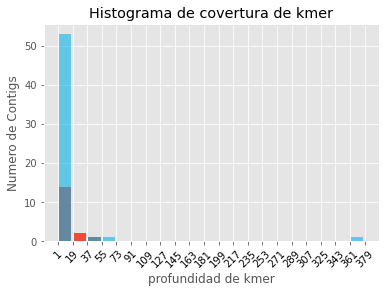

MuestraERR2929692 con 75 contigs
range(1, 141, 6)
[0 0 8 3 1 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1] [  1   7  13  19  25  31  37  43  49  55  61  67  73  79  85  91  97 103
 109 115 121 127 133 139]
[ 5 48  0  0  3  0  0  0  0  0  0  0  1  0  0  0  0  0  2  0  0  0  0] [  1   7  13  19  25  31  37  43  49  55  61  67  73  79  85  91  97 103
 109 115 121 127 133 139]


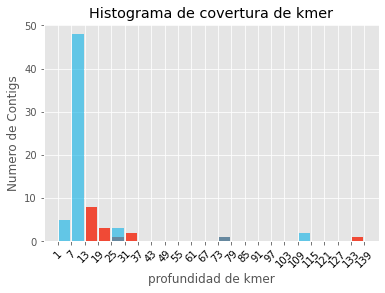

MuestraSRR2244244 con 126 contigs
range(4, 1881, 89)
[38  9  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0] [   4   93  182  271  360  449  538  627  716  805  894  983 1072 1161
 1250 1339 1428 1517 1606 1695 1784 1873]
[70  2  0  0  1  2  1  0  0  0  0  0  0  0  0  0  0  1  0  0  1] [   4   93  182  271  360  449  538  627  716  805  894  983 1072 1161
 1250 1339 1428 1517 1606 1695 1784 1873]


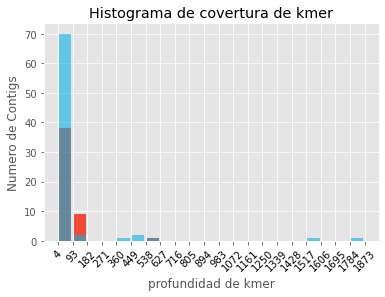

MuestraSRR3465532 con 21 contigs
range(8, 1873, 88)
[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [   8   96  184  272  360  448  536  624  712  800  888  976 1064 1152
 1240 1328 1416 1504 1592 1680 1768 1856]
[ 1  2 12  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1] [   8   96  184  272  360  448  536  624  712  800  888  976 1064 1152
 1240 1328 1416 1504 1592 1680 1768 1856]


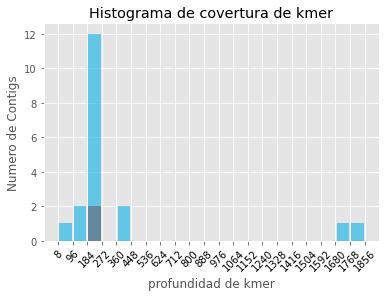

MuestraSRR3465557 con 58 contigs
range(0, 1841, 87)
[ 0  0 13  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0] [   0   87  174  261  348  435  522  609  696  783  870  957 1044 1131
 1218 1305 1392 1479 1566 1653 1740 1827]
[ 1  7 25  3  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1] [   0   87  174  261  348  435  522  609  696  783  870  957 1044 1131
 1218 1305 1392 1479 1566 1653 1740 1827]


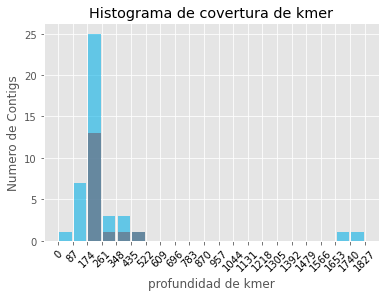

MuestraSRR4025861 con 87 contigs
range(20, 548, 25)
[11 10  1  1  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  1] [ 20  45  70  95 120 145 170 195 220 245 270 295 320 345 370 395 420 445
 470 495 520 545]
[55  3  1  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0] [ 20  45  70  95 120 145 170 195 220 245 270 295 320 345 370 395 420 445
 470 495 520 545]


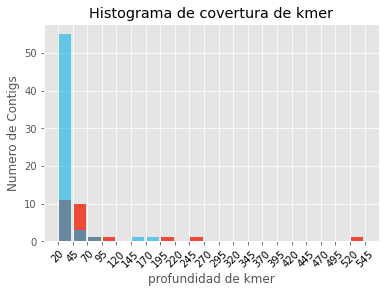

MuestraSRR4245476 con 47 contigs
range(23, 438, 19)
[5 0 2 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0] [ 23  42  61  80  99 118 137 156 175 194 213 232 251 270 289 308 327 346
 365 384 403 422]
[26  7  2  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  2] [ 23  42  61  80  99 118 137 156 175 194 213 232 251 270 289 308 327 346
 365 384 403 422]


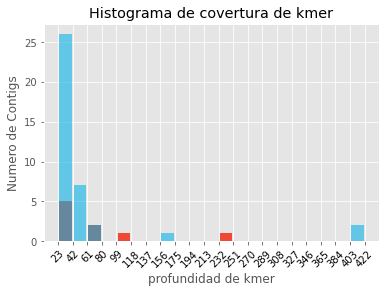

MuestraSRR5146463 con 83 contigs
range(17, 702, 32)
[ 0  7 11  3  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1] [ 17  49  81 113 145 177 209 241 273 305 337 369 401 433 465 497 529 561
 593 625 657 689]
[ 5 40  4  1  4  0  0  0  0  0  1  0  0  0  0  0  0  0  1  1  0] [ 17  49  81 113 145 177 209 241 273 305 337 369 401 433 465 497 529 561
 593 625 657 689]


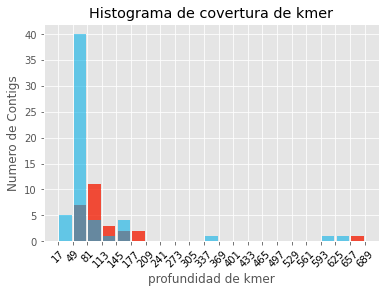

MuestraSRR5167853 con 121 contigs
range(7, 717, 33)
[ 2 24  4 12  5  5  3  0  1  0  0  0  0  0  0  0  0  0  0  0  1] [  7  40  73 106 139 172 205 238 271 304 337 370 403 436 469 502 535 568
 601 634 667 700]
[57  2  2  0  0  0  1  0  0  2  0  0  0  0  0  0  0  0  0  0  0] [  7  40  73 106 139 172 205 238 271 304 337 370 403 436 469 502 535 568
 601 634 667 700]


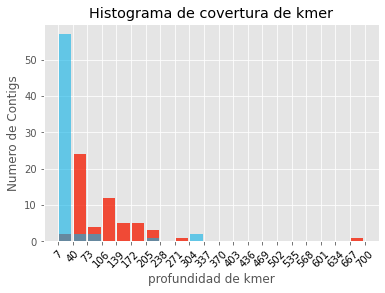

MuestraSRR5168236 con 92 contigs
range(2, 340, 16)
[0 5 6 2 4 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1] [  2  18  34  50  66  82  98 114 130 146 162 178 194 210 226 242 258 274
 290 306 322 338]
[ 3 57  2  5  1  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0] [  2  18  34  50  66  82  98 114 130 146 162 178 194 210 226 242 258 274
 290 306 322 338]


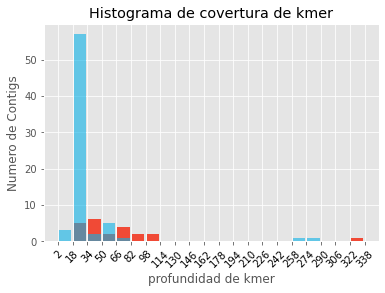

MuestraSRR5168385 con 98 contigs
range(3, 540, 25)
[ 1 12 12  2  3  0  1  0  1  1  0  0  0  0  0  0  0  0  0  0  1] [  3  28  53  78 103 128 153 178 203 228 253 278 303 328 353 378 403 428
 453 478 503 528]
[14 44  1  1  1  0  0  0  0  1  0  0  0  2  0  0  0  0  0  0  0] [  3  28  53  78 103 128 153 178 203 228 253 278 303 328 353 378 403 428
 453 478 503 528]


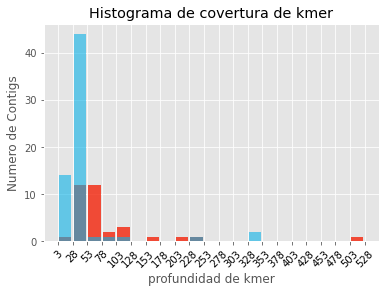

MuestraSRR5168393 con 69 contigs
range(12, 420, 19)
[3 8 4 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1] [ 12  31  50  69  88 107 126 145 164 183 202 221 240 259 278 297 316 335
 354 373 392 411]
[20 25  0  2  1  0  0  0  0  0  0  0  0  1  0  0  0  0  2  0  0] [ 12  31  50  69  88 107 126 145 164 183 202 221 240 259 278 297 316 335
 354 373 392 411]


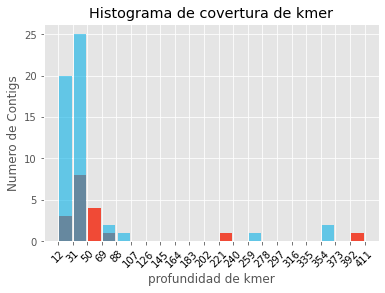

MuestraSRR5168488 con 96 contigs
range(5, 500, 23)
[ 0 16 16  6  2  1  0  2  2  0  0  0  0  0  0  1  0  0  0  0  1] [  5  28  51  74  97 120 143 166 189 212 235 258 281 304 327 350 373 396
 419 442 465 488]
[ 2 41  1  1  1  0  0  0  0  0  0  1  0  0  0  0  2  0  0  0  0] [  5  28  51  74  97 120 143 166 189 212 235 258 281 304 327 350 373 396
 419 442 465 488]


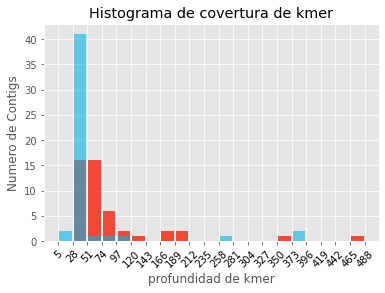

MuestraSRR5714002 con 87 contigs
range(0, 20794, 990)
[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1] [    0   990  1980  2970  3960  4950  5940  6930  7920  8910  9900 10890
 11880 12870 13860 14850 15840 16830 17820 18810 19800 20790]
[62  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0] [    0   990  1980  2970  3960  4950  5940  6930  7920  8910  9900 10890
 11880 12870 13860 14850 15840 16830 17820 18810 19800 20790]


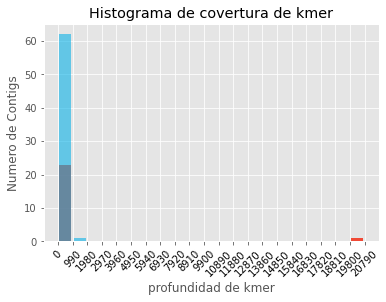

MuestraSRR6348595 con 92 contigs
range(16, 1117, 52)
[23  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0] [  16   68  120  172  224  276  328  380  432  484  536  588  640  692
  744  796  848  900  952 1004 1056 1108]
[56  1  1  1  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1] [  16   68  120  172  224  276  328  380  432  484  536  588  640  692
  744  796  848  900  952 1004 1056 1108]


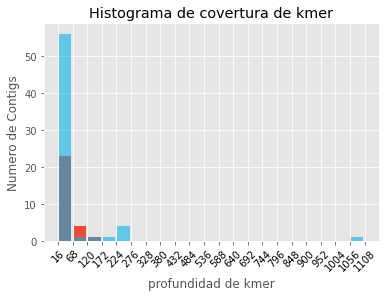

MuestraSRR6514141 con 131 contigs
range(27, 989, 45)
[24  9  2  2  3  4  2  3  0  0  0  1  1  0  0  0  0  0  1  0  1] [ 27  72 117 162 207 252 297 342 387 432 477 522 567 612 657 702 747 792
 837 882 927 972]
[71  3  0  1  0  0  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0] [ 27  72 117 162 207 252 297 342 387 432 477 522 567 612 657 702 747 792
 837 882 927 972]


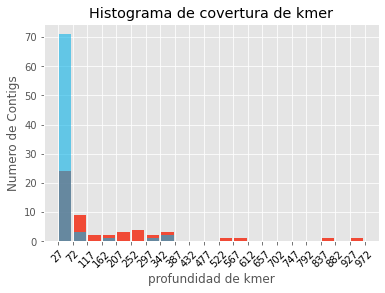

MuestraSRR6514350 con 161 contigs
range(12, 618, 28)
[14 16  5 15  6  3  1  1  3  1  2  1  0  0  0  2  0  0  0  0  0] [ 12  40  68  96 124 152 180 208 236 264 292 320 348 376 404 432 460 488
 516 544 572 600]
[76  5  1  0  1  1  2  1  0  2  0  0  0  0  0  1  0  0  0  0  1] [ 12  40  68  96 124 152 180 208 236 264 292 320 348 376 404 432 460 488
 516 544 572 600]


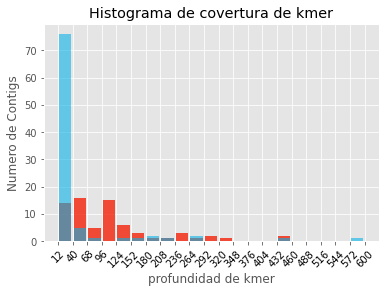

MuestraSRR6519357 con 142 contigs
range(33, 1257, 58)
[19 29 12  2  1  2  0  1  0  0  1  0  0  0  0  0  0  1  1  1  0] [  33   91  149  207  265  323  381  439  497  555  613  671  729  787
  845  903  961 1019 1077 1135 1193 1251]
[64  2  0  0  0  0  2  1  1  0  0  0  0  0  0  1  0  0  0  0  1] [  33   91  149  207  265  323  381  439  497  555  613  671  729  787
  845  903  961 1019 1077 1135 1193 1251]


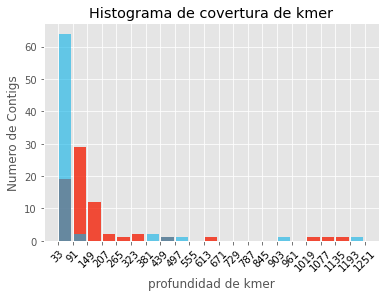

MuestraSRR6675860 con 86 contigs
range(100, 1192, 52)
[6 8 9 0 0 3 1 0 0 1 0 0 0 0 0 0 0 1 0 0] [ 100  152  204  256  308  360  412  464  516  568  620  672  724  776
  828  880  932  984 1036 1088 1140]
[44  0  4  5  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  2] [ 100  152  204  256  308  360  412  464  516  568  620  672  724  776
  828  880  932  984 1036 1088 1140]


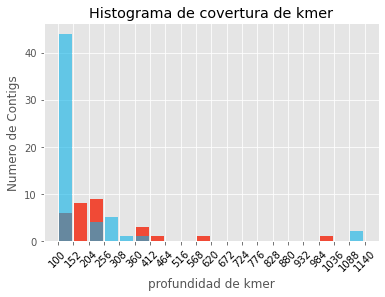

MuestraSRR8175017 con 33 contigs
range(5, 81, 3)
[0 0 0 0 0 0 0 1 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [ 5  8 11 14 17 20 23 26 29 32 35 38 41 44 47 50 53 56 59 62 65 68 71 74
 77 80]
[17  7  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  1] [ 5  8 11 14 17 20 23 26 29 32 35 38 41 44 47 50 53 56 59 62 65 68 71 74
 77 80]


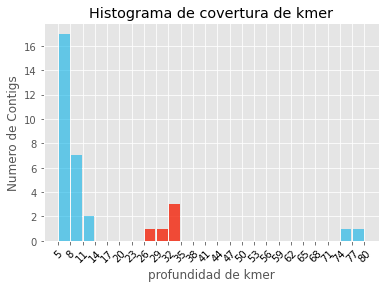

MuestraSRR8607449 con 116 contigs
range(48, 1431, 65)
[32  8  1  3  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1] [  48  113  178  243  308  373  438  503  568  633  698  763  828  893
  958 1023 1088 1153 1218 1283 1348 1413]
[58  6  1  0  1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0] [  48  113  178  243  308  373  438  503  568  633  698  763  828  893
  958 1023 1088 1153 1218 1283 1348 1413]


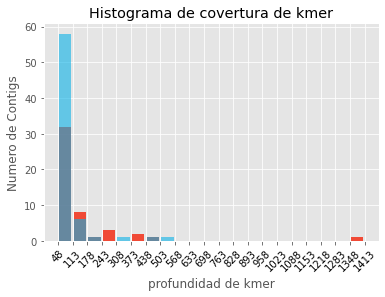

MuestraSRR8607459 con 81 contigs
range(22, 5532, 262)
[30  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1] [  22  284  546  808 1070 1332 1594 1856 2118 2380 2642 2904 3166 3428
 3690 3952 4214 4476 4738 5000 5262 5524]
[46  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0] [  22  284  546  808 1070 1332 1594 1856 2118 2380 2642 2904 3166 3428
 3690 3952 4214 4476 4738 5000 5262 5524]


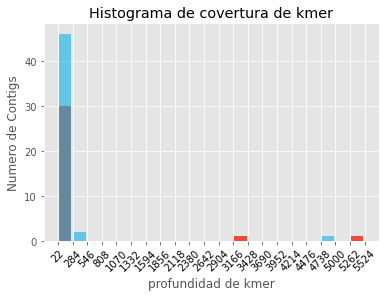

MuestraSRR8607467 con 68 contigs
range(69, 1404, 63)
[0 8 1 2 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1] [  69  132  195  258  321  384  447  510  573  636  699  762  825  888
  951 1014 1077 1140 1203 1266 1329 1392]
[44  1  2  0  1  0  0  0  0  1  0  0  0  0  1  1  0  0  0  0  0] [  69  132  195  258  321  384  447  510  573  636  699  762  825  888
  951 1014 1077 1140 1203 1266 1329 1392]


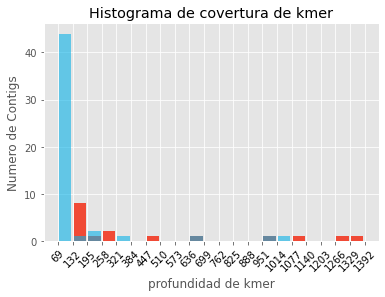

MuestraSRR8668707 con 42 contigs
range(22, 344, 15)
[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0] [ 22  37  52  67  82  97 112 127 142 157 172 187 202 217 232 247 262 277
 292 307 322 337]
[ 8 20  0  1  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  1] [ 22  37  52  67  82  97 112 127 142 157 172 187 202 217 232 247 262 277
 292 307 322 337]


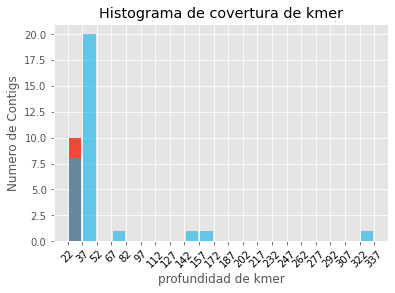

MuestraSRR8778550 con 61 contigs
range(81, 855, 36)
[11  4  2  3  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0] [ 81 117 153 189 225 261 297 333 369 405 441 477 513 549 585 621 657 693
 729 765 801 837]
[32  0  2  1  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  2] [ 81 117 153 189 225 261 297 333 369 405 441 477 513 549 585 621 657 693
 729 765 801 837]


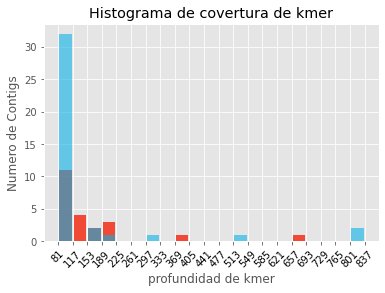

MuestraSRR9042857 con 28 contigs
range(21, 284, 12)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [ 21  33  45  57  69  81  93 105 117 129 141 153 165 177 189 201 213 225
 237 249 261 273]
[16  7  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2] [ 21  33  45  57  69  81  93 105 117 129 141 153 165 177 189 201 213 225
 237 249 261 273]


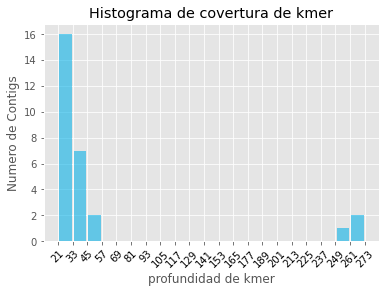

In [ ]:
for paso in range(0,78,3):
  m=dataf.iloc[:,paso:paso+3]
  nom=m.columns
  nom[0]
  mfilt=m[m[nom[0]]!=0]
  print('Muestra'+str(nom[0])[:-3]+' con '+str(len(mfilt))+' contigs')
  salto=int((max(mfilt[nom[1]])-min(mfilt[nom[1]]))/20)
  intervalos=range(int(min(mfilt[nom[1]])),int(max(mfilt[nom[1]]))+salto,salto)
  print(intervalos)
  plasm=mfilt[mfilt[nom[2]]==1]
  crom=mfilt[mfilt[nom[2]]==0]
  frecuenciasp, extremosp = np.histogram(plasm[nom[1]], bins=intervalos)
  frecuenciasc, extremosc = np.histogram(crom[nom[1]], bins=intervalos)
  print(frecuenciasp, extremosp)
  print(frecuenciasc, extremosc)
  plt.hist(x=plasm[nom[1]], bins=intervalos, color='#F3230A', rwidth=0.85,alpha=0.8)
  plt.hist(x=crom[nom[1]], bins=intervalos, color='#0BB2E7', rwidth=0.85,alpha=0.6)
  plt.title('Histograma de covertura de kmer')
  plt.xlabel('profundidad de kmer')
  plt.ylabel('Numero de Contigs')
  plt.xticks(intervalos, color = 'black', rotation = 45)
  plt.show() #dibujamos el histograma

In [ ]:


m690=dataf.iloc[:,:3]
m690filt=m690[m690['ERR2929690_ID']!=0]
#print(m690filt.describe())
#intervalos=range(int(min(m690filt['Kmer_Cov'])),int(max(m690filt['Kmer_Cov']))+3,int((max(m690filt['Kmer_Cov'])-min(m690filt['Kmer_Cov']))/100))
intervalos=range(int(min(m690filt['Kmer_Cov'])),65,int((max(m690filt['Kmer_Cov'])-min(m690filt['Kmer_Cov']))/100))
print(intervalos[:10])
frecuencias, extremos = np.histogram(m690filt['Kmer_Cov'], bins=intervalos)
print(frecuencias, extremos)
plasm690=m690filt[m690filt['Tipo_sec']==1]
crom690=m690filt[m690filt['Tipo_sec']==0]
#print(plasm690,crom690)
frecuenciasp, extremosp = np.histogram(plasm690['Kmer_Cov'], bins=intervalos)
frecuenciasc, extremosc = np.histogram(crom690['Kmer_Cov'], bins=intervalos)
print(frecuenciasp, extremosp)
print(frecuenciasc, extremosc)
plt.hist(x=plasm690['Kmer_Cov'], bins=intervalos, color='#33FF9F', rwidth=0.85)
plt.hist(x=crom690['Kmer_Cov'], bins=intervalos, color='#33AFFF', rwidth=0.85,)
plt.title('Histograma de covertura de kmer')
plt.xlabel('profundidad de kmer')
plt.ylabel('Numero de Contigs')
plt.xticks(intervalos)
plt.show() #dibujamos el histograma